In [11]:
from logistic_regression import LogRegCCD
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
# generating artificial data
X, y = make_classification(n_samples=1000,
                           n_features=2000,
                           n_informative=500,
                           n_redundant=1500,
                           n_classes=2,
                           random_state=42)

df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(X.shape[1])])
df["y"] = y

print(df.head())

    feature_1   feature_2   feature_3  feature_4   feature_5  feature_6  \
0 -173.964247 -122.205961  -22.309843   8.512860  -26.160472 -24.883313   
1 -318.978329   75.824021  -80.045730  -2.917473   26.788151  -3.829347   
2 -302.068504   15.478900   36.358011   7.394553   66.235371  -0.638229   
3 -152.897608 -265.291697 -264.995409  25.628331  359.811603  17.114195   
4 -161.595675   38.318708   26.005585  13.550358  102.100165   1.522942   

    feature_7  feature_8  feature_9  feature_10  ...  feature_1992  \
0  -25.188212 -10.108742  -3.819346  134.672941  ...     55.286585   
1  -28.269338   5.600129  -4.363068  117.194418  ...    149.354317   
2 -108.872834 -10.433248  -3.449867   53.800690  ...    178.054858   
3  118.676913   1.578963   2.024475   -4.937555  ...   -147.692315   
4  360.745029  14.007076  10.265400   60.107595  ...     70.404891   

   feature_1993  feature_1994  feature_1995  feature_1996  feature_1997  \
0      8.050617    188.482941    183.149104    215.90

In [13]:
# splitting data
df_train, df_test, y_train, y_test = train_test_split(df.drop(columns=["y"]), df["y"], test_size=0.3, random_state=42, stratify=df["y"])

print(df_train.head())
print(y_train.head())

      feature_1   feature_2   feature_3  feature_4   feature_5  feature_6  \
757   31.975353  204.181641  262.736433 -22.148442  -25.669795 -24.165420   
920  -10.599339 -122.246668  115.222313 -13.837599 -105.992025  13.896092   
203 -155.194531  199.200660 -162.756468  30.526495  123.140225  -3.125202   
616 -100.618681   76.456518   11.341277  11.152844  127.095438 -10.486132   
823  171.931183  129.683344 -204.159662 -27.758257  145.899602  14.165559   

      feature_7  feature_8  feature_9  feature_10  ...  feature_1991  \
757 -103.857865 -28.337032  10.197397 -145.931235  ...     13.149550   
920 -235.510334  -2.200694  -2.790054  117.232476  ...      7.891285   
203  -39.473135 -19.886849  -0.312643   19.259740  ...     -5.561799   
616   -7.390826  -3.069358   6.135816   19.871886  ...     -1.185941   
823 -116.263630   9.522552  -4.964329  -29.905661  ...     -3.960269   

     feature_1992  feature_1993  feature_1994  feature_1995  feature_1996  \
757    473.996420   -305.00

In [4]:
# training with fixed parameters
iterations = 10
alpha = 0.9
lmbda = 0.9
lr = LogRegCCD()
lr.fit(iterations, df_train, y_train, alpha, lmbda)
print(f"beta: {lr.beta}")

pred_train = lr.predict(df_train)
accuracy_train = accuracy_score(y_train, pred_train)
print(f"training accuracy: {accuracy_train}")

pred_test = lr.predict(df_test)
accuracy_test = accuracy_score(y_test, pred_test)
print(f"testing accuracy: {accuracy_test}")

beta: [-0.04129411  0.00263003  0.         ...  0.0009153   0.
  0.        ]
training accuracy: 1.0
testing accuracy: 0.6966666666666667


In [14]:
# training on highest lambda value
iterations = 10
alpha = 0.9
lmbda = 0.9
lr = LogRegCCD()
lambda_max = lr.compute_lambda_max(df_train, y_train, alpha)
print(f"lambda_max: {lambda_max}")
lr.fit(iterations, df_train, y_train, alpha, lambda_max)
print(f"beta for lambda max: {lr.beta}") # <- vector of zeros

lr.fit(iterations, df_train, y_train, alpha, lambda_max-1e-10)
print(f"beta: {lr.beta}") # <- vector of zeros


lambda_max: 66.83226183736797
beta for lambda max: [0. 0. 0. ... 0. 0. 0.]
beta: [1.47150293e-14 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


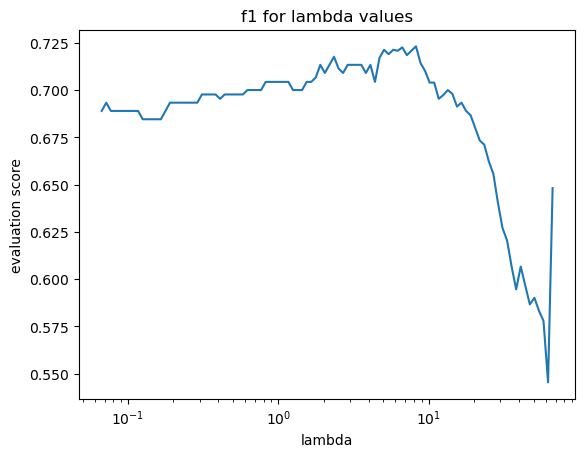

In [9]:
# evaluating
alpha = 0.9
lr = LogRegCCD()
lr.plot(LogRegCCD.F1, df_train, y_train, df_test, y_test, alpha)

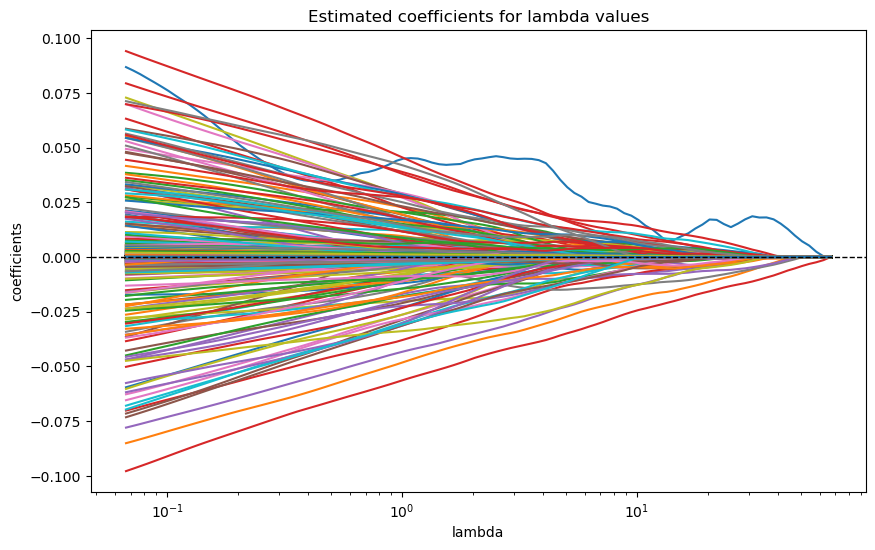

In [10]:
# plotting coefficients
alpha = 0.9
lr = LogRegCCD()
lr.plot_coefficients(df_train, y_train, alpha)